# Sales Prediction

## What to do?
Create a model that predicts sales based on the different marketing platforms provided.

## What is this?
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

## Import Crucial Packages

In [10]:
# disable any error messages
import warnings
warnings.filterwarnings('ignore')

# fundamental data exploration and manipulation
import numpy as np
import pandas as pd

# dataset visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train-test split
from sklearn.model_selection import train_test_split

# linear regression
import statsmodels.api as sm

# root mean square deviation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Exploratory Data Analysis
We check on the shape and description of each variable contained in the `advertising.csv`, here's the [dataset](https://www.kaggle.com/datasets/ashydv/advertising-dataset).

In [11]:
df = pd.read_csv("/content/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
df.shape

(200, 4)

Now that we found its dimension consisting of 4 columns and 200 rows shown on the result above, we understand how many to fit into our model and how many convergence is done with the rows found on the dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


From the results above we can understand that the equally of these columns consist of 200 rows each whilst showing the marketing platform sales minimum and maximum specified row on the dataset.

In [15]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Exploratory Data Visualization

Prior to splitting the dataset into training, we need to remove any null or garbage values that wouldn't make any sense in our dataset by observing potential outliers.

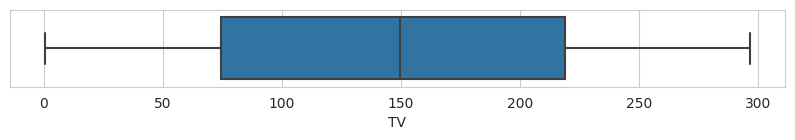

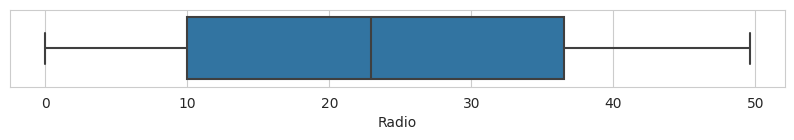

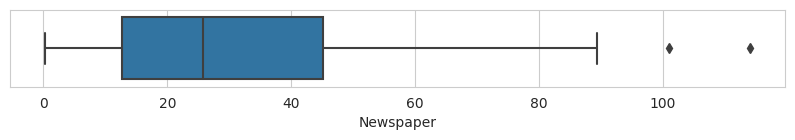

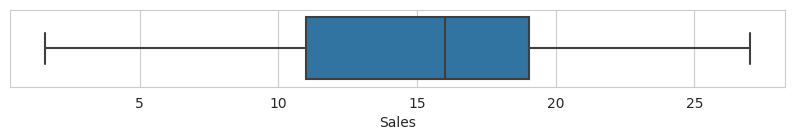

In [16]:
sns.set_style('whitegrid')

for i in df:
    plt.figure(figsize=(10,1))
    sns.boxplot(x=df[i])
    plt.show()

On the figure above, it shows that there are no outliers to consider when creating our model, therefore, all values retain.

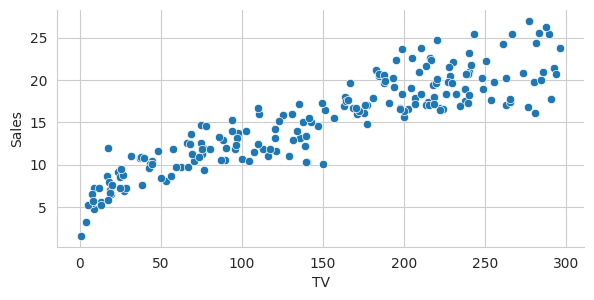

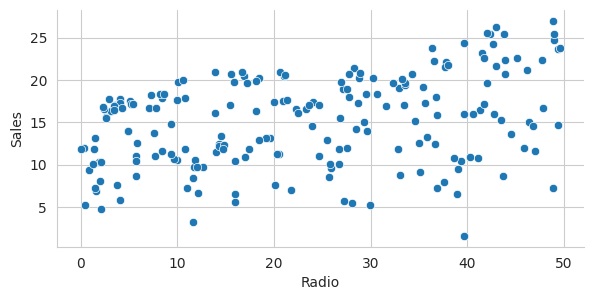

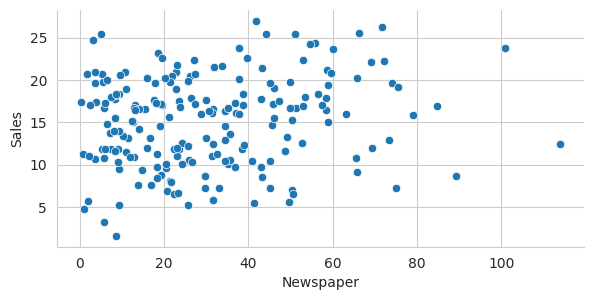

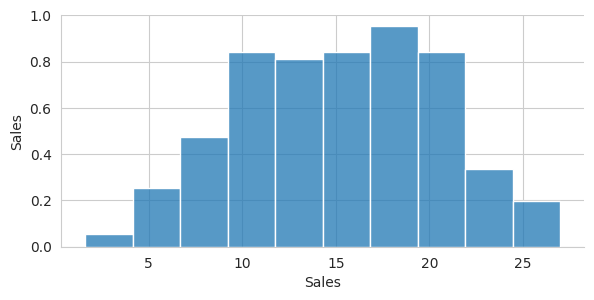

In [17]:
for i in df:
    sns.pairplot(df, x_vars=i, y_vars='Sales', height=3, aspect=2, kind='scatter')
    plt.show()

From the plot shown, we can find that the `sales` on `TV` and `Radio` consists of closer cluster rates of sale compared to the rest, this serves to be a perfect usage of linear regression as our model.

## Model Building

We'll use linear regression as our model for this prediction since we consist of predictor variables to have our univariate.

Linear regression's equation is simply<br>
*y = wx + b*

Considering the other predictor variables in the function to build the model<br>
*$f_{w, b}$(x) = wx + b*

Though if given multiple variables based from our dataset<br>
*$f_{w, b}$(x) = $w_{i}$ $x_{i}$ + ... + $w_{n}$ $x_{n}$ + b*

* *f(x)* as the reponse function
* *w* as the slope
* *x* as the predictor
* *b* as the estimated intercept

Depending on the rows we have, these are the model parameters that provides the amount of convergence done.

## Train-Test Split

After understanding how linear regression works for this, we can now split our variable into train and test sets. These split by 70% for the train set and the remaining 30% is given to the test set.

In [18]:
x = df['TV']
y = df['Sales']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

After we've divided these into train-test sets with 70 / 30 let's check on the values by using `.head()` on `x_train` and `y_train`

In [20]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [21]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

We then use a package `statmodels` which automatically puts a regression line on the dataset with the ordinary least squares, though, we're required to have an argument for`add_constant` by inserting our `x_train`.

In [22]:
y_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, y_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 06 May 2023   Prob (F-statistic):           1.52e-52
Time:                        04:52:19   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Provided on the figure above are all the attributes formulated though we're only concerned with a few
* r-squared = 0.816
* p-values = `TV` receiving 0.0545
* f-statistic = 611.2 (significant)

This requires a visualization to further understand the linear regression equation's fit

On the column of coef
* const = 6.9487
* TV = 0.0545

*sales = 6.948 + 0.054 x TV*

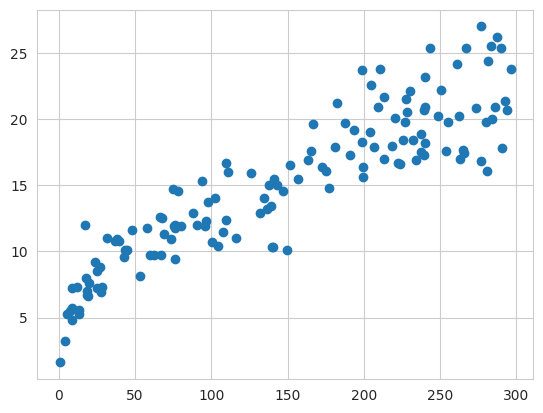

In [23]:
plt.scatter(x_train, y_train)
plt.show()

This is the data without the regression line.

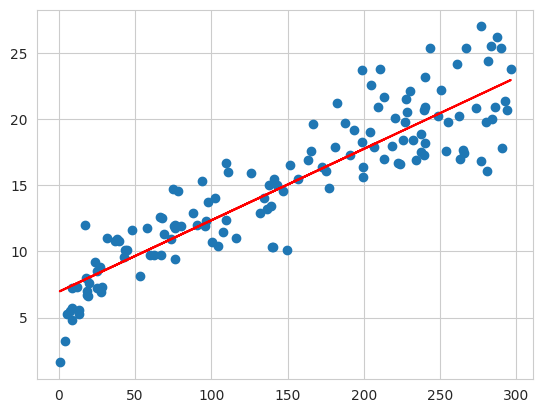

In [24]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054 * x_train, 'r')
plt.show()

Here is a plot where the regression line is present with the equation of the sales finding its fit with each data.

# Residual Analysis

After finding the regression line from the prediction, we need to understand on how large the error terms by using a regression cost function<br>
*err = train - pred*

In [25]:
y_pred = lr.predict(y_sm)
residue = y_train - y_pred
residue

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

With the code above, we can plot this easily rather than seeing the numerical values.

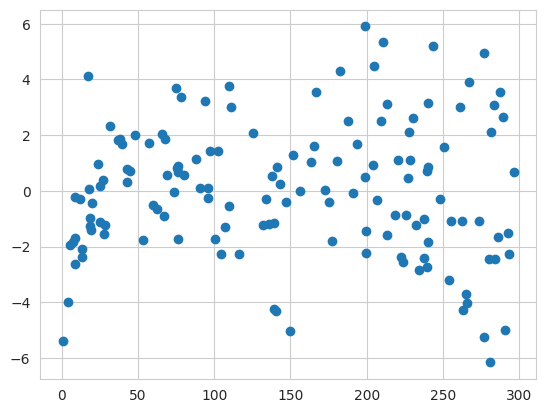

In [26]:
plt.scatter(x_train, residue)
plt.show()

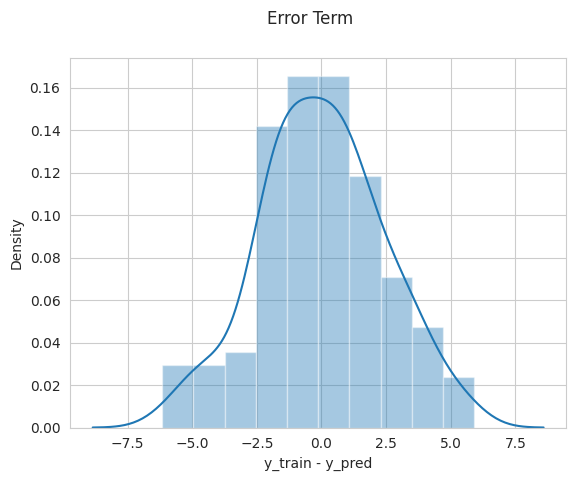

In [27]:
figure = plt.figure()
sns.distplot(residue, bins=10)
figure.suptitle('Error Term')
plt.xlabel('y_train - y_pred')
plt.show()

The dataset provided shows a confident prediction of the coefficients.

## Test Prediction

Since we've done the `train` prediction we can proceed on `test` by executing the same process to fit on the regression line by using `predict`.

In [28]:
x_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_sm)
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

Great, let's move on to finding the root mean square deviation next as `r-square` from a square root.

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [30]:
r_sq = r2_score(y_test, y_pred)
r_sq

0.792103160124566

From these values that we've received let's visualize the test set and see the regression line fitted.

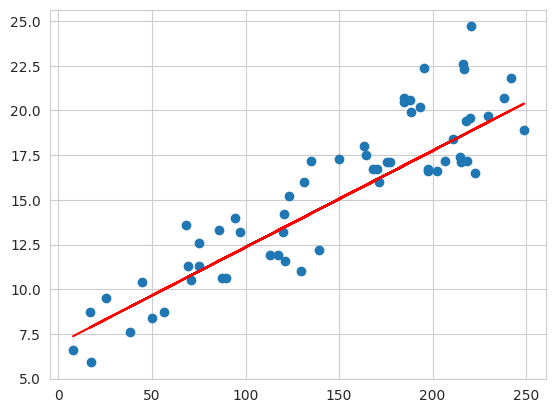

In [31]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()

## Conclusion

Voilà! We have our linear regression showing both the `y_train` and `x_train` visualization with the fitted regression line showing that the prediction power done by utilizing the model and the dataset given are excellent to predict the `sales`.